Marliyatou TOUANGA DIALLO

Nada NADIRE

NOGAYE DIENG

# MACHINE LEARNING FOR DATA ENGINEERING DE2

# Project overview

Carbon emissions, specifically CO2 emissions, have become a central issue in the global conversation about climate change and environmental responsibility. In recent years, the urgency to address rising carbon footprints has gained tremendous momentum in the media, among governments, and within the business world. CO2 emissions are one of the primary contributors to global warming, and understanding their sources is critical for implementing effective climate action strategies.

A country's carbon footprint can be directly or indirectly influenced by a variety of economic, social, and environmental factors, including energy consumption, industrial activities, population growth, and urbanization. 
Accurately predicting these emissions is essential for governments and organizations seeking to implement policies that reduce their environmental impact. 
By focusing on understanding the key drivers of CO2 emissions, we can better forecast future trends and identify areas where interventions may be most effective.



## objectives

In this project, we aim to predict a country's CO2 emissions per capita  based on several key economic and demographic factors, such as GDP, energy consumption, and population dynamics. While total CO2 emissions are an important metric for understanding a country’s overall environmental impact, focusing on CO2 emissions per capita provides a more nuanced perspective. 

CO2 per capita measures the average amount of carbon dioxide emitted per person in a country, offering insight into how carbon-intensive the lifestyle or development model is for individuals within that country. This metric is especially useful for comparing countries of varying population sizes, allowing for more equitable comparisons of carbon footprints between smaller and larger nations.

### Scope of the project

The project does not account for all possible variables that could influence emissions, such as industrial practices, geopolitical factors, or technological innovation. We are also not considering the temporal effects or the inclusion of potential external events (e.g., pandemics, wars) that may affect emissions data.


## Data source

In [9]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


The data we are working on is an open source dataset provided by “our world in data” that gives us with insight on energy consumption, population dynamics and carbon emission per country over the year 1990 up to 2011

In [11]:
# imports
import pandas as pd
import numpy as np

file_path = "climate_change_download_0.xls"
data= pd.read_excel(file_path, sheet_name="Data")

# Data processing

### Let's look at our inital Data

In [14]:
data.shape

(13512, 28)

In [15]:
data.head(10)

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,29.57481,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.208235,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,4.967875,..,..,..,...,..,..,..,..,..,..,..,..,..,..
5,ARE,United Arab Emirates,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,4.644515,..,..,..,...,..,..,..,..,..,..,..,..,..,..
6,ARG,Argentina,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,1.230535,..,..,..,...,..,..,..,..,..,..,..,..,..,..
7,ARM,Armenia,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,...,..,..,..,..,..,..,..,..,..,..
8,ASM,American Samoa,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,17.89262,..,..,..,...,..,..,..,..,..,..,..,..,..,..
9,ATG,Antigua and Barbuda,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,32.42317,..,..,..,...,..,..,..,..,..,..,..,..,..,..


## Let's remove columns that are not relevant

In [17]:
data['SCALE'].unique()

array([0, 'Text'], dtype=object)

In [18]:
data['Decimals'].unique()

array([1, 0, 'Text'], dtype=object)

In [19]:
#dropping column we don't use
data = data[data['SCALE']!='Text']
data = data.drop(['Country name', 'Series code', 'SCALE', 'Decimals'], axis='columns')
print("Current number of columns:")
data.shape

Current number of columns:


(10017, 24)

## Filling missing values with Nan

Here we need to fill the empty data with Nan values to make it easier to identify and preprocess them later

In [22]:
#Transform the ".." strings and emplty cells ("") into NaN values for easier recognission as missing values
data.iloc[:,2:] = data.iloc[:,2:].replace({'':np.nan, '..':np.nan})

C:\Users\33766\AppData\Local\Temp\ipykernel_18532\2252551024.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.iloc[:,2:] = data.iloc[:,2:].replace({'':np.nan, '..':np.nan})


## Tranform the year columns to numerical values

In [24]:
#transforming year to numeric
data = data.applymap(lambda x: pd.to_numeric(x, errors='ignore'))

C:\Users\33766\AppData\Local\Temp\ipykernel_18532\1554059287.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: pd.to_numeric(x, errors='ignore'))
C:\Users\33766\AppData\Local\Temp\ipykernel_18532\1554059287.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.applymap(lambda x: pd.to_numeric(x, errors='ignore'))


## keeping and renaming columns

In [26]:
data['Series name'].unique()

array(['Land area below 5m (% of land area)',
       'Agricultural land under irrigation (% of total ag. land)',
       'Cereal yield (kg per hectare)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Access to electricity (% of total population)',
       'Energy use per units of GDP (kg oil eq./$1,000 of 2005 PPP $)',
       'Energy use per capita (kilograms of oil equivalent)',
       'CO2 emissions, total (KtCO2)',
       'CO2 emissions per capita (metric tons)',
       'CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)',
       'Other GHG emissions, total (KtCO2e)',
       'Methane (CH4) emissions, total (KtCO2e)',
       'Nitrous oxide (N2O) emissions, total (KtCO2e)',
       'Disaster risk reduction progress score (1-5 scale; 5=best)',
       'GHG net emissions/removals by LUCF (MtCO2e)',
       'Droughts, floods, extreme temps (% pop. avg. 1990-2009)',
       'Population below 5m (% of total)',
       'Population in urban agglomerations >1million (%)',

In [27]:
chosen_vars = {'Cereal yield (kg per hectare)': 'cereal_yield',
               'Foreign direct investment, net inflows (% of GDP)': 'fdi_gdp_perc',
               'Access to electricity (% of total population)': 'elec_access_perc',
               'Energy use per units of GDP (kg oil eq./$1,000 of 2005 PPP $)': 'eng_per_gdp',
               'Energy use per capita (kilograms of oil equivalent)': 'eng_per_cap',
               'CO2 emissions, total (KtCO2)': 'co2_total',
               'CO2 emissions per capita (metric tons)': 'co2_per_cap',
               'CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)': 'co2_per_gdp',
               'Other GHG emissions, total (KtCO2e)': 'other_ghg_total',
               'Methane (CH4) emissions, total (KtCO2e)': 'ch4_total',
               'Nitrous oxide (N2O) emissions, total (KtCO2e)': 'n2o_total',
               'Droughts, floods, extreme temps (% pop. avg. 1990-2009)': 'nat_emerg',
               'Population in urban agglomerations >1million (%)': 'pop_urb_aggl_perc',
               'Nationally terrestrial protected areas (% of total land area)': 'prot_area_perc',
               'GDP ($)': 'gdp',
               'GNI per capita (Atlas $)': 'gni_per_cap',
               'Under-five mortality rate (per 1,000)': 'under_5_mort_rate',
               'Population growth (annual %)': 'pop_growth_perc',
               'Population': 'pop',
               'Urban population growth (annual %)': 'urb_pop_growth_perc',
               'Urban population': 'urb_pop'
                }

# rename all variables in the column "Series name" with comprehensible shorter versions
data['Series name'] = data['Series name'].replace(to_replace=chosen_vars)

In [28]:
data['Series name']

0        Land area below 5m (% of land area)
1        Land area below 5m (% of land area)
2        Land area below 5m (% of land area)
3        Land area below 5m (% of land area)
4        Land area below 5m (% of land area)
                        ...                 
13507                                urb_pop
13508                                urb_pop
13509                                urb_pop
13510                                urb_pop
13511                                urb_pop
Name: Series name, Length: 10017, dtype: object

## Transformations

### Let's create new columns for our selected features and one column for the year

In [31]:
chosen_cols = list(chosen_vars.values())

# define an empty list, where sub-dataframes for each feature will be saved
frame_list = []

# iterate over all chosen features
for variable in chosen_cols:
    # pick only rows corresponding to the current feature
    frame = data[data['Series name'] == variable]
    
    # melt all the values for all years into one column and rename the columns correspondingly
    frame = frame.melt(id_vars=['Country code', 'Series name']).rename(columns={'Country code': 'country', 'variable': 'year', 'value': variable}).drop(['Series name'], axis='columns')
    
    # add the melted dataframe for the current feature into the list
    frame_list.append(frame)

# merge all sub-frames into a single dataframe, making an outer binding on the key columns 'country','year'
from functools import reduce
all_vars = reduce(lambda left, right: pd.merge(left, right, on=['country','year'], how='outer'), frame_list)

In [32]:
all_vars.head()

,country,year,cereal_yield,fdi_gdp_perc,elec_access_perc,eng_per_gdp,eng_per_cap,co2_total,co2_per_cap,co2_per_gdp,...,nat_emerg,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
0,ABW,1990,NaN,NaN,NaN,NaN,NaN,1840.834,29.620641,NaN,...,NaN,NaN,0.105547,NaN,NaN,NaN,1.820254,62147.0,1.780501,31259.941
1,ABW,1991,NaN,21.185138,NaN,NaN,NaN,1928.842,29.838835,NaN,...,NaN,NaN,0.104930,8.720670e+08,NaN,NaN,3.936181,64642.0,3.337974,32321.000
2,ABW,1992,NaN,-3.857809,NaN,NaN,NaN,1723.490,25.239288,NaN,...,NaN,NaN,0.104930,9.586592e+08,NaN,NaN,5.484041,68286.0,4.882234,33938.142
3,ABW,1993,NaN,-1.655492,NaN,NaN,NaN,1771.161,24.405233,NaN,...,NaN,NaN,0.104930,1.083240e+09,14940.0,NaN,6.088818,72573.0,5.483368,35851.062
4,ABW,1994,NaN,-5.874439,NaN,NaN,NaN,1763.827,22.977867,NaN,...,NaN,NaN,0.104930,1.245810e+09,15320.0,NaN,5.611677,76762.0,5.002538,37690.142


### Let's handle the missing data

In [34]:
all_vars.isnull().sum()

country                   0
year                      0
cereal_yield           1377
fdi_gdp_perc           1111
elec_access_perc       5027
eng_per_gdp            2082
eng_per_cap            1956
co2_total              1143
co2_per_cap            1146
co2_per_gdp            1557
other_ghg_total        4542
ch4_total              4526
n2o_total              4526
nat_emerg              4958
pop_urb_aggl_perc      2582
prot_area_perc          726
gdp                     779
gni_per_cap            1013
under_5_mort_rate       716
pop_growth_perc         278
pop                     252
urb_pop_growth_perc     490
urb_pop                 467
dtype: int64

#### Filtering missing data on the year with a threshold of 40%

In [36]:
# Group by 'year' and calculate the percentage of missing values
missing_percentage_by_year = (all_vars.isnull()
    .groupby(all_vars['year'])
    .mean()  
    .mean(axis=1)  
    * 100 
)

missing_percentage_by_year = missing_percentage_by_year.sort_values()
print("Percentage of missing values by year:")
for year, percentage in missing_percentage_by_year.items():
    print(f"{int(year)}: {percentage:.2f}%")
    
# Filter out years with missing percentage > 40%
valid_years = missing_percentage_by_year[missing_percentage_by_year <= 40].index
all_vars_clean = all_vars[all_vars['year'].isin(valid_years)]

# Print the years that were removed
removed_years = missing_percentage_by_year[missing_percentage_by_year > 40].index
print("Years removed due to high missing values (>40%):")
print(removed_years.tolist())


Percentage of missing values by year:
2005: 22.19%
2000: 23.75%
1995: 24.58%
1990: 26.63%
2007: 30.43%
2006: 30.47%
2004: 30.71%
2008: 31.87%
2003: 31.98%
2002: 32.00%
2001: 32.06%
1999: 32.26%
1998: 32.45%
1997: 32.58%
1996: 32.77%
1994: 33.23%
1993: 33.44%
1992: 33.77%
1991: 35.85%
2009: 38.78%
2010: 56.69%
2011: 91.30%
Years removed due to high missing values (>40%):
[2010, 2011]


#### Filtering the missing Data on the country with a treshold of 90

In [38]:

# define an array with the unique country values
countries_count_missing = dict.fromkeys(all_vars_clean['country'].unique(), 0)

# iterate through all rows and count the amount of NaN values for each country
for ind, row in all_vars_clean.iterrows():
    countries_count_missing[row['country']] += row.isnull().sum()

# sort the countries by missing values
countries_missing_sorted = dict(sorted(countries_count_missing.items(), key=lambda item: item[1]))

# print the missing values for each country
print("missing values by country:")
for key, val in countries_missing_sorted.items():
    print(key, ":", val)

print("number of missing values in the whole dataset before filtering the countries:")
print(all_vars_clean.isnull().sum().sum())
print("number of rows before filtering the countries:")
print(all_vars_clean.shape[0])


# filter only rows for countries with less than 90 missing values
countries_filter = []
for key, val in countries_missing_sorted.items():
    if val<90:
        countries_filter.append(key)

all_vars_clean = all_vars_clean[all_vars_clean['country'].isin(countries_filter)]

print("number of missing values in the whole dataset after filtering the countries:")
print(all_vars_clean.isnull().sum().sum())
print("number of rows after filtering the countries:")
print(all_vars_clean.shape[0])

missing values by country:
AGO : 89
ARG : 89
BGD : 89
BOL : 89
BRA : 89
CHL : 89
CHN : 89
CIV : 89
CMR : 89
COG : 89
COL : 89
CRI : 89
DOM : 89
ECU : 89
EGY : 89
GHA : 89
GTM : 89
HND : 89
IDN : 89
IND : 89
ISR : 89
JOR : 89
KEN : 89
MAR : 89
MOZ : 89
MYS : 89
NGA : 89
PAK : 89
PAN : 89
PER : 89
PHL : 89
PRY : 89
SAU : 89
SDN : 89
SEN : 89
SLV : 89
SYR : 89
TGO : 89
THA : 89
TZA : 89
URY : 89
VEN : 89
VNM : 89
ZAF : 89
ZMB : 89
AUS : 90
AUT : 90
BGR : 90
CAN : 90
CHE : 90
DEU : 90
DNK : 90
ESP : 90
FIN : 90
FRA : 90
GBR : 90
HUN : 90
IRL : 90
ITA : 90
JPN : 90
KOR : 90
LAC : 90
LMC : 90
LMY : 90
MEX : 90
MIC : 90
MNA : 90
NLD : 90
NZL : 90
PRT : 90
ROM : 90
SAS : 90
SWE : 90
TUR : 90
UMC : 90
USA : 90
ZAR : 90
EMU : 91
GRC : 91
YEM : 91
DZA : 92
POL : 92
WLD : 93
ETH : 94
LIC : 94
SSA : 94
ARE : 95
IRN : 97
BEL : 100
ECA : 100
UKR : 100
LBN : 101
RUS : 101
ARM : 102
BLR : 102
UZB : 102
KAZ : 103
CZE : 104
NIC : 105
AZE : 106
GEO : 107
HTI : 107
BEN : 109
BWA : 109
JAM : 109
LKA : 109
T

In [39]:
all_vars_clean.shape

(900, 23)

#### As can be seen below, they are still columns with high amount of Nan values. We are dropping them

In [41]:
all_vars_clean.isnull().sum()

country                  0
year                     0
cereal_yield             0
fdi_gdp_perc             0
elec_access_perc       855
eng_per_gdp              0
eng_per_cap              0
co2_total               45
co2_per_cap             45
co2_per_gdp             45
other_ghg_total        720
ch4_total              720
n2o_total              720
nat_emerg              855
pop_urb_aggl_perc        0
prot_area_perc           0
gdp                      0
gni_per_cap              0
under_5_mort_rate        0
pop_growth_perc          0
pop                      0
urb_pop_growth_perc      0
urb_pop                  0
dtype: int64

In [42]:
# remove features with more than 20 missing values

from itertools import compress

# create a boolean mapping of features with more than 20 missing values
vars_bad = all_vars_clean.isnull().sum()>45

# remove the columns corresponding to the mapping of the features with many missing values
all_vars_clean2 = all_vars_clean.drop(compress(data = all_vars_clean.columns, selectors = vars_bad), axis='columns')

print("Remaining missing values per column:")
print(all_vars_clean2.isnull().sum())

# delete rows with any number of missing values
all_vars_clean3 = all_vars_clean2.dropna(axis='rows', how='any')

print("Remaining missing values per column:")
print(all_vars_clean3.isnull().sum())

print("Final shape of the cleaned dataset:")
print(all_vars_clean3.shape)

Remaining missing values per column:
country                 0
year                    0
cereal_yield            0
fdi_gdp_perc            0
eng_per_gdp             0
eng_per_cap             0
co2_total              45
co2_per_cap            45
co2_per_gdp            45
pop_urb_aggl_perc       0
prot_area_perc          0
gdp                     0
gni_per_cap             0
under_5_mort_rate       0
pop_growth_perc         0
pop                     0
urb_pop_growth_perc     0
urb_pop                 0
dtype: int64
Remaining missing values per column:
country                0
year                   0
cereal_yield           0
fdi_gdp_perc           0
eng_per_gdp            0
eng_per_cap            0
co2_total              0
co2_per_cap            0
co2_per_gdp            0
pop_urb_aggl_perc      0
prot_area_perc         0
gdp                    0
gni_per_cap            0
under_5_mort_rate      0
pop_growth_perc        0
pop                    0
urb_pop_growth_perc    0
urb_pop             

# Exploring the Data

Let's take a look at our cleaned data

In [45]:
all_vars_clean3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 855 entries, 66 to 5100
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              855 non-null    object 
 1   year                 855 non-null    object 
 2   cereal_yield         855 non-null    float64
 3   fdi_gdp_perc         855 non-null    float64
 4   eng_per_gdp          855 non-null    float64
 5   eng_per_cap          855 non-null    float64
 6   co2_total            855 non-null    float64
 7   co2_per_cap          855 non-null    float64
 8   co2_per_gdp          855 non-null    float64
 9   pop_urb_aggl_perc    855 non-null    float64
 10  prot_area_perc       855 non-null    float64
 11  gdp                  855 non-null    float64
 12  gni_per_cap          855 non-null    float64
 13  under_5_mort_rate    855 non-null    float64
 14  pop_growth_perc      855 non-null    float64
 15  pop                  855 non-null    float6

In [46]:
all_vars_clean3.describe()

,cereal_yield,fdi_gdp_perc,eng_per_gdp,eng_per_cap,co2_total,co2_per_cap,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
count,855.000000,855.000000,855.000000,855.000000,8.550000e+02,855.000000,855.000000,855.000000,855.000000,8.550000e+02,855.000000,855.000000,855.000000,8.550000e+02,855.000000,8.550000e+02
mean,2398.716608,2.906072,235.977591,907.996907,1.772421e+05,2.111909,380.454974,21.854680,14.273983,1.114168e+11,2273.777778,70.107485,2.039405,8.549592e+07,3.180727,3.304475e+07
std,1377.519982,3.556659,149.611098,888.062221,6.502981e+05,2.835195,268.607769,11.894105,10.367856,3.019297e+11,3074.206834,53.885567,0.787671,2.302306e+08,1.261705,7.727478e+07
min,175.700000,-4.256403,66.335372,116.511476,7.077310e+02,0.063452,45.552592,5.163394,0.250869,9.826326e+08,110.000000,4.900000,-0.150849,2.388902e+06,0.001906,1.103318e+06
25%,1363.600000,0.797935,135.479601,427.828100,5.403325e+03,0.434780,197.414707,11.741582,5.954225,9.524844e+09,530.000000,27.000000,1.566972,8.166880e+06,2.379012,4.158317e+06
50%,2119.300000,2.002856,189.926393,628.578655,2.149595e+04,1.126852,306.032233,19.530777,12.844871,2.465747e+10,1150.000000,48.800000,2.058516,1.898701e+07,3.144574,8.817980e+06
75%,3256.400000,3.816842,289.711809,926.476160,9.735518e+04,2.280054,445.109537,30.747568,19.590347,9.739606e+10,2795.000000,108.700000,2.510846,4.639063e+07,3.968700,2.449968e+07
max,7555.200000,40.157087,1106.802978,6379.735088,7.031916e+06,17.849115,1969.457279,58.323823,53.749825,4.521827e+12,24700.000000,243.000000,11.180657,1.324655e+09,12.829046,5.709263e+08


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
all_vars_clean3['country'].unique()

array(['AGO', 'ARG', 'BGD', 'BOL', 'BRA', 'CHL', 'CHN', 'CIV', 'CMR',
       'COG', 'COL', 'CRI', 'DOM', 'ECU', 'EGY', 'GHA', 'GTM', 'HND',
       'IDN', 'IND', 'ISR', 'JOR', 'KEN', 'MAR', 'MOZ', 'MYS', 'NGA',
       'PAK', 'PAN', 'PER', 'PHL', 'PRY', 'SAU', 'SDN', 'SEN', 'SLV',
       'SYR', 'TGO', 'THA', 'TZA', 'URY', 'VEN', 'VNM', 'ZAF', 'ZMB'],
      dtype=object)

# Visualization

## Some insightful visualization

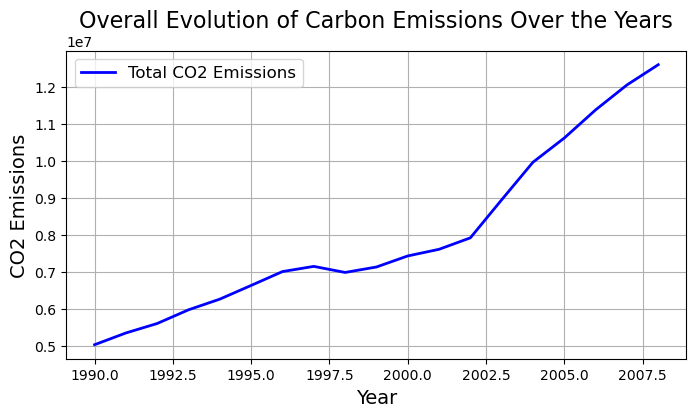

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by year and sum up the emissions
yearly_emissions = all_vars_clean3.groupby('year')[['co2_total']].sum().reset_index()

# Convert the 'year' column to an integer for better plotting
yearly_emissions['year'] = yearly_emissions['year'].astype(int)

# Plot the overall evolution
plt.figure(figsize=(8, 4))
sns.lineplot(x='year', y='co2_total', data=yearly_emissions, label="Total CO2 Emissions", linewidth=2, color="blue")

# Add titles and labels
plt.title("Overall Evolution of Carbon Emissions Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("CO2 Emissions", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


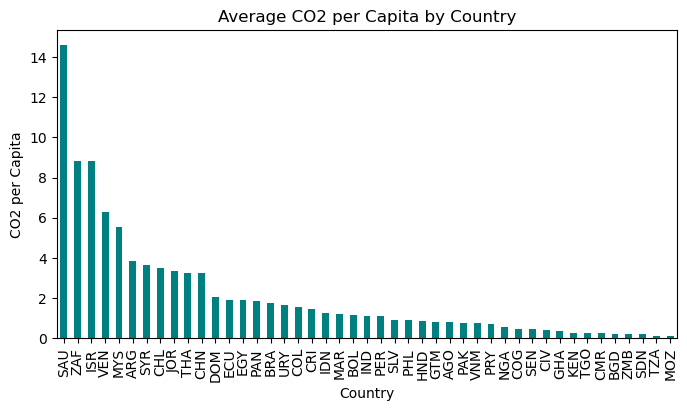

In [52]:
# Average CO2 per Capita by Country
country_avg_co2 = all_vars_clean3.groupby('country')['co2_per_cap'].mean().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(8, 4))
country_avg_co2.plot(kind='bar', color="teal")
plt.title("Average CO2 per Capita by Country")
plt.xlabel("Country")
plt.ylabel("CO2 per Capita")
plt.xticks(rotation=90)
plt.show()


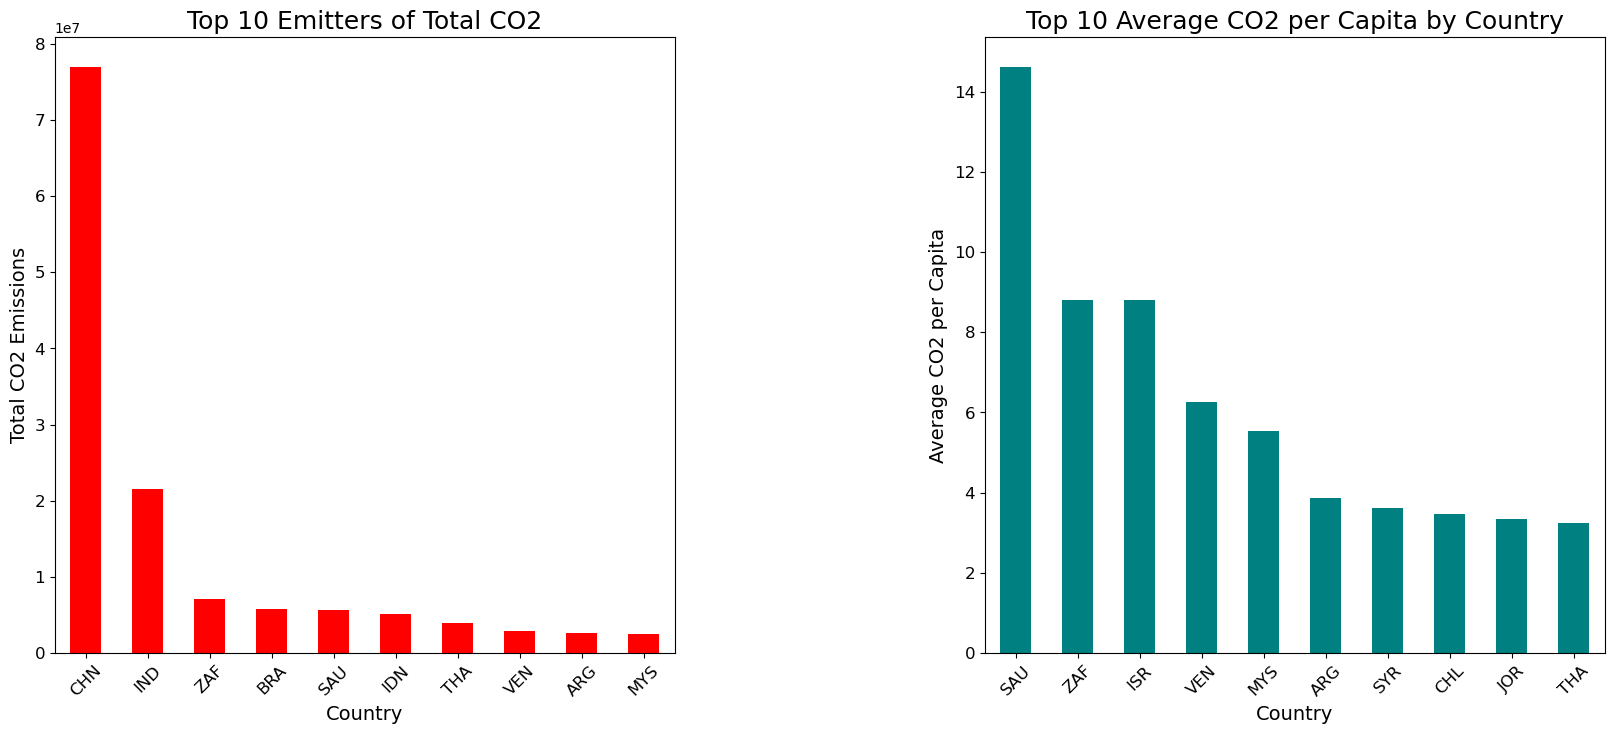

In [53]:
# Top Emitters of Total CO2
top_emitters = all_vars_clean3.groupby('country')['co2_total'].sum().sort_values(ascending=False).head(10)

# Average CO2 per Capita by Country
country_avg_co2 = all_vars_clean3.groupby('country')['co2_per_cap'].mean().sort_values(ascending=False).head(10)

# Create subplots for side-by-side visualization
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
fig.subplots_adjust(wspace=0.5)

# Bar plot for top emitters of total CO2
top_emitters.plot(kind='bar', ax=ax[0], color="red")
ax[0].set_title("Top 10 Emitters of Total CO2", fontsize=18)
ax[0].set_xlabel("Country", fontsize=14)
ax[0].set_ylabel("Total CO2 Emissions", fontsize=14)
ax[0].tick_params(axis='x', labelrotation=45, labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)

# Bar plot for average CO2 per capita by country
country_avg_co2.plot(kind='bar', ax=ax[1], color="teal")
ax[1].set_title("Top 10 Average CO2 per Capita by Country", fontsize=18)
ax[1].set_xlabel("Country", fontsize=14)
ax[1].set_ylabel("Average CO2 per Capita", fontsize=14)
ax[1].tick_params(axis='x', labelrotation=45, labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)

# Show the plots
plt.show()


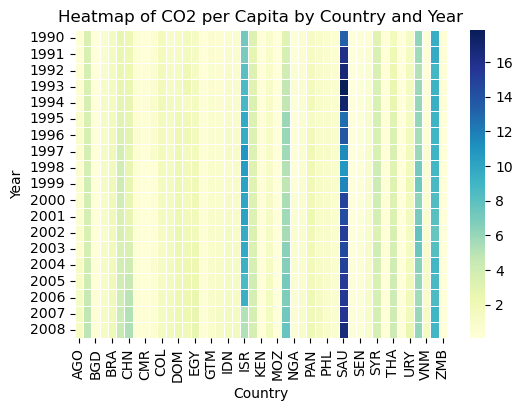

In [54]:
# Pivot table for heatmap
heatmap_data = all_vars_clean3.pivot_table(values=['co2_per_cap', 'co2_total'], index='year', columns='country')

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data['co2_per_cap'], cmap="YlGnBu", linewidths=0.5)
plt.title("Heatmap of CO2 per Capita by Country and Year")
plt.xlabel("Country")
plt.ylabel("Year")
plt.show()

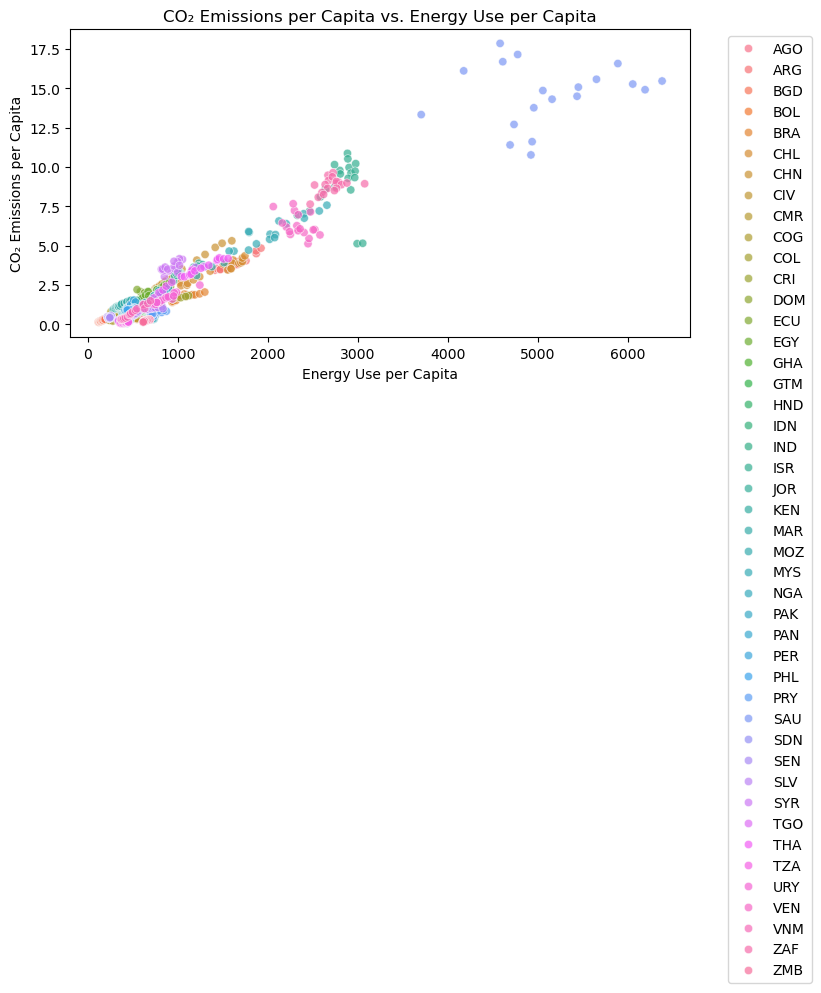

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.scatterplot(x='eng_per_cap', y='co2_per_cap', hue='country', data=all_vars_clean3, alpha=0.7)
plt.title('CO₂ Emissions per Capita vs. Energy Use per Capita')
plt.xlabel('Energy Use per Capita')
plt.ylabel('CO₂ Emissions per Capita')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


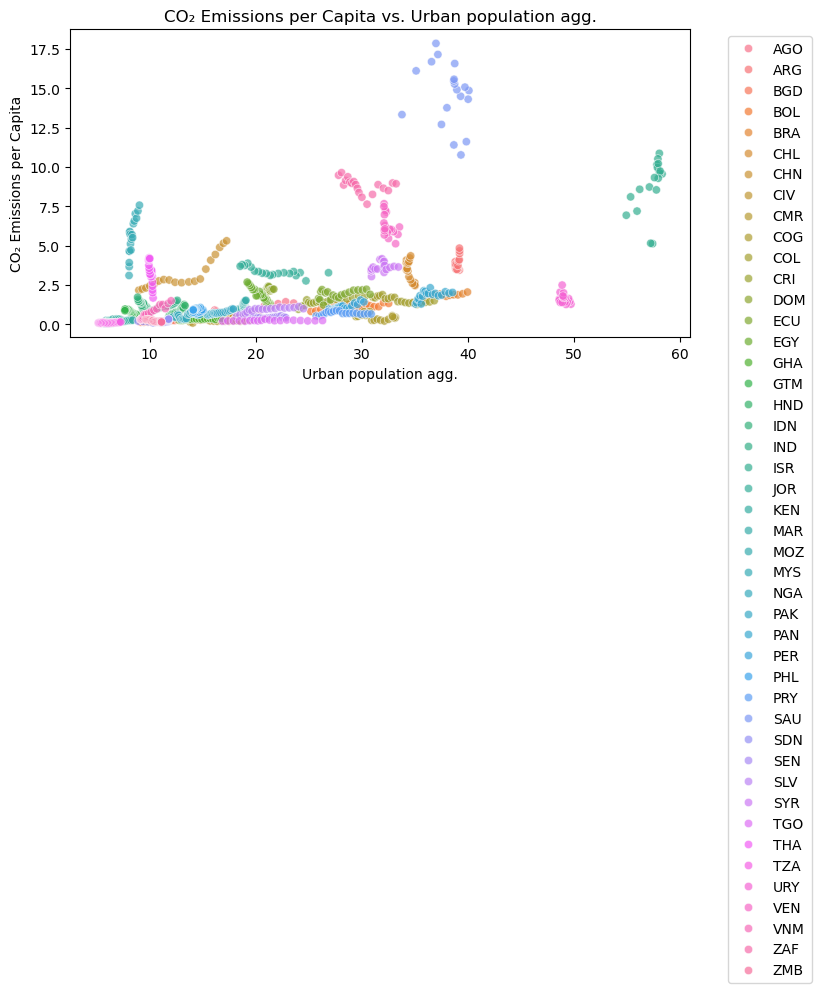

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.scatterplot(x='pop_urb_aggl_perc', y='co2_per_cap', hue='country', data=all_vars_clean3, alpha=0.7)
plt.title('CO₂ Emissions per Capita vs. Urban population agg.')
plt.xlabel('Urban population agg.')
plt.ylabel('CO₂ Emissions per Capita')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


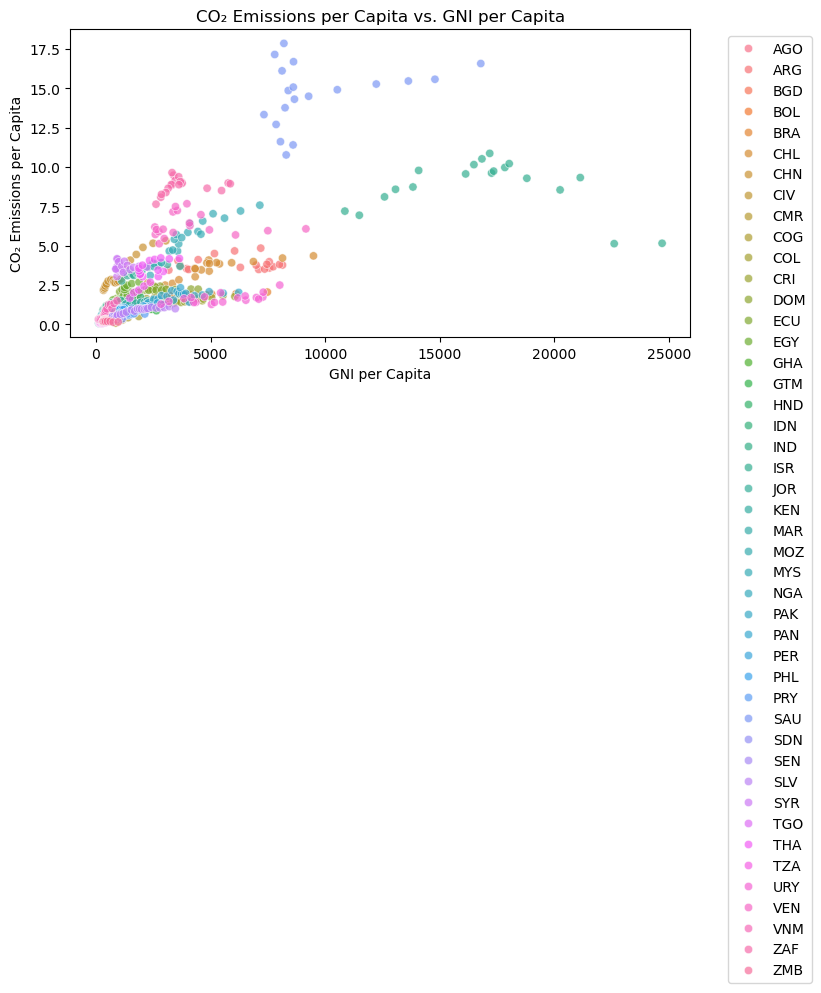

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.scatterplot(x='gni_per_cap', y='co2_per_cap', hue='country', data=all_vars_clean3, alpha=0.7)
plt.title('CO₂ Emissions per Capita vs. GNI per Capita')
plt.xlabel('GNI per Capita')
plt.ylabel('CO₂ Emissions per Capita')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


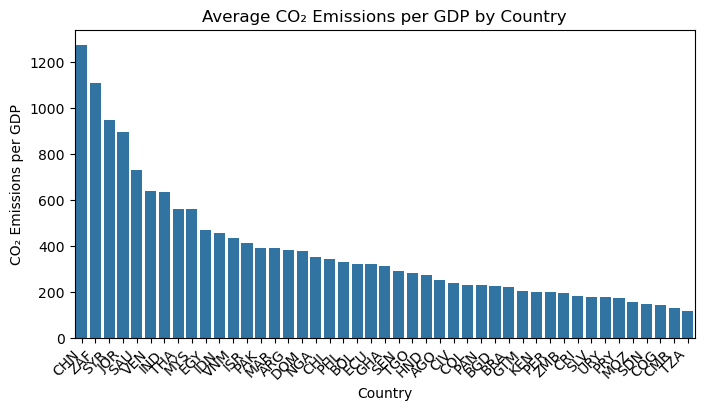

In [58]:
plt.figure(figsize=(8, 4))
sns.barplot(x='country', y='co2_per_gdp', data=all_vars_clean3.groupby('country')['co2_per_gdp'].mean().reset_index().sort_values(by='co2_per_gdp', ascending=False))
plt.title('Average CO₂ Emissions per GDP by Country')
plt.xlabel('Country')
plt.ylabel('CO₂ Emissions per GDP')
plt.xticks(rotation=45, ha='right')
plt.show()


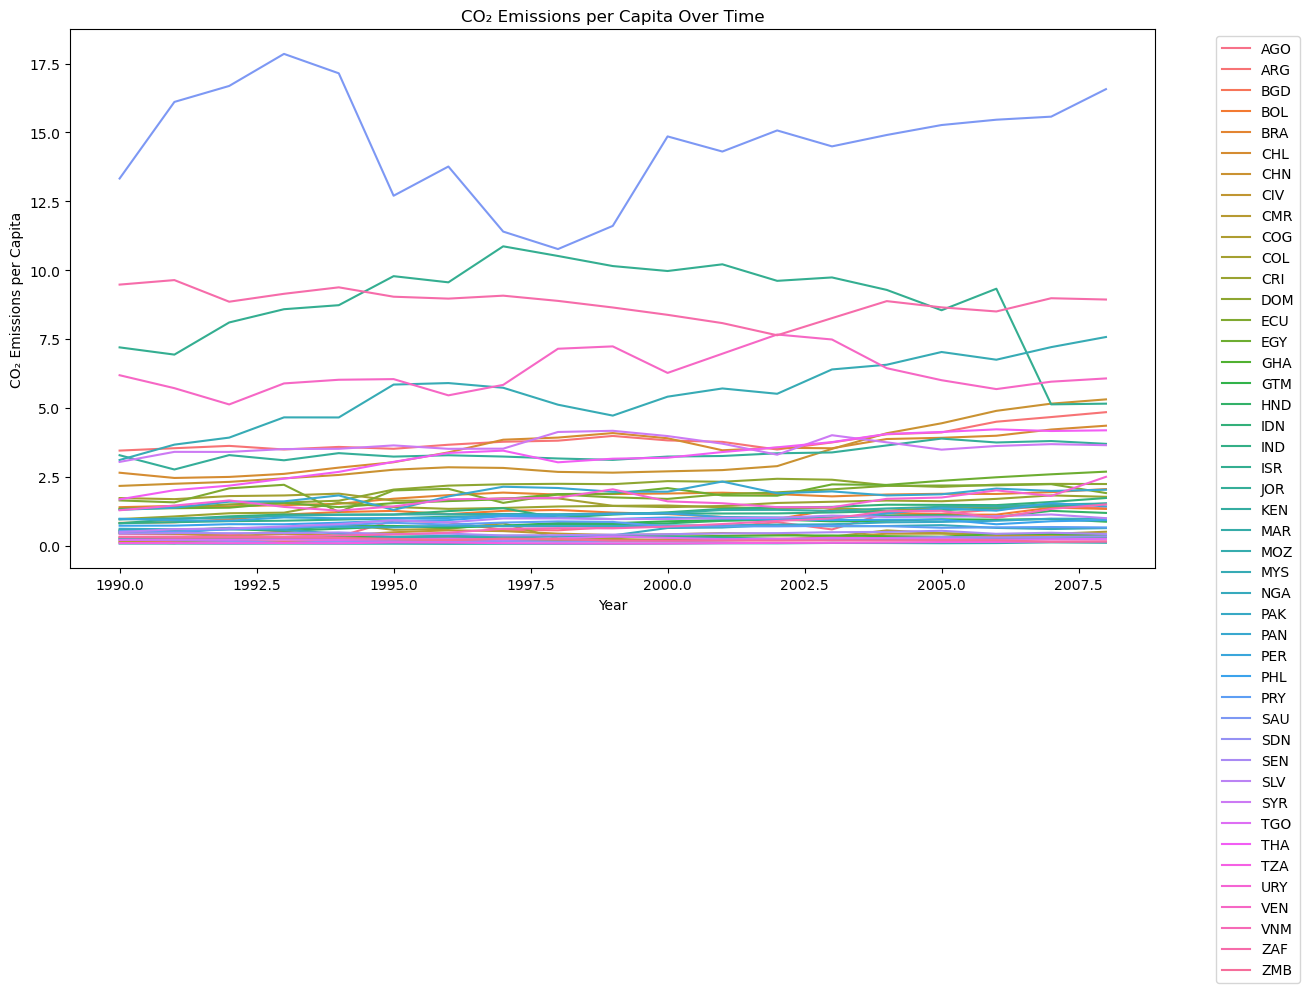

In [59]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='year', y='co2_per_cap', hue='country', data=all_vars_clean3)
plt.title('CO₂ Emissions per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions per Capita')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



# Outlier Detection


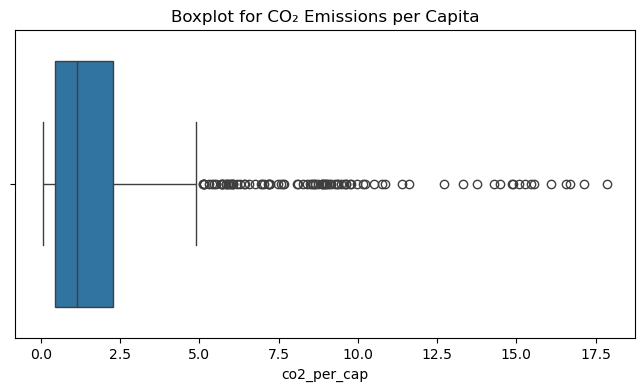

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for a single column
plt.figure(figsize=(8, 4))
sns.boxplot(x=all_vars_clean3['co2_per_cap'])
plt.title('Boxplot for CO₂ Emissions per Capita')
plt.show()



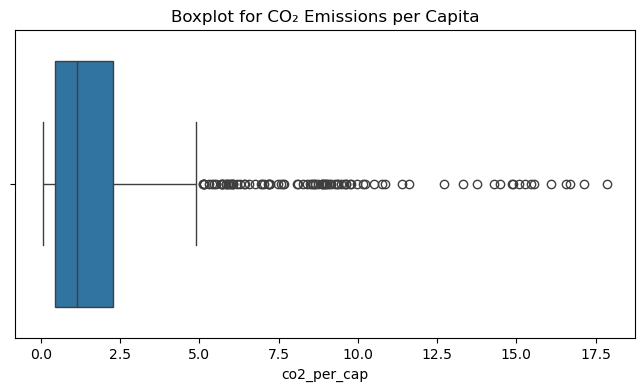

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for a single column
plt.figure(figsize=(8, 4))
sns.boxplot(x=all_vars_clean3['co2_per_cap'])
plt.title('Boxplot for CO₂ Emissions per Capita')
plt.show()



In [63]:
from sklearn.ensemble import IsolationForest

# Fit Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
all_vars_clean3['co2_outlier'] = iso.fit_predict(all_vars_clean3[['co2_per_cap']])

# Count outliers
print(all_vars_clean3['co2_outlier'].value_counts())


co2_outlier
 1    812
-1     43
Name: count, dtype: int64


C:\Users\33766\AppData\Local\Temp\ipykernel_18532\736884116.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_vars_clean3['co2_outlier'] = iso.fit_predict(all_vars_clean3[['co2_per_cap']])


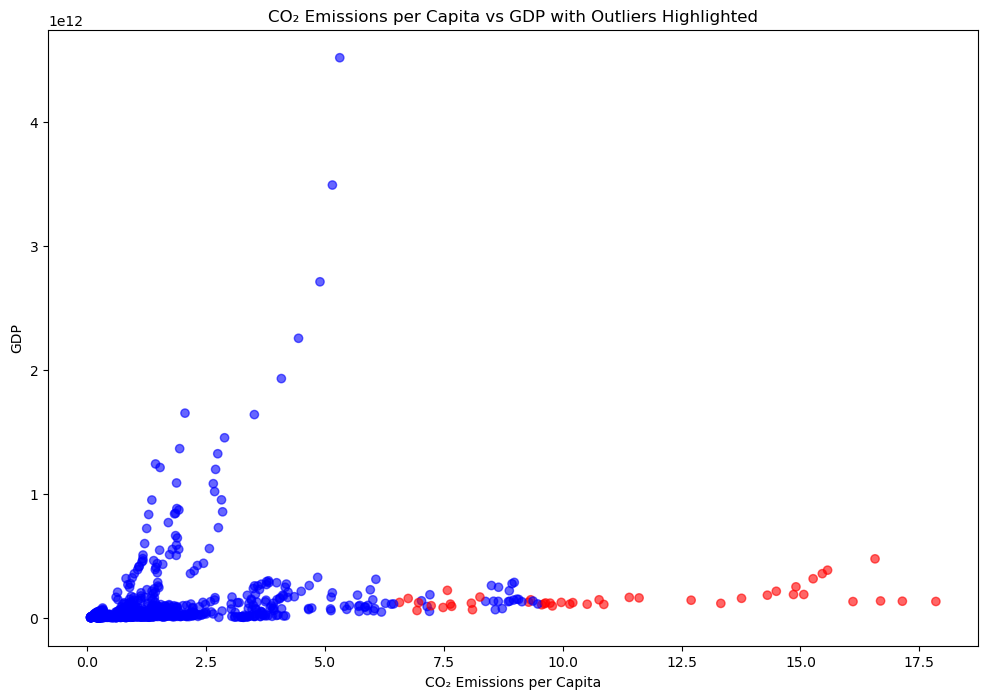

In [67]:
import matplotlib.pyplot as plt

# Assign colors: Red for outliers (-1), Blue for normal points (1)
colors = ['red' if o == -1 else 'blue' for o in all_vars_clean3['c2_outlier']]

# Scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(all_vars_clean3['co2_per_cap'], all_vars_clean3['gdp'], c=colors, alpha=0.6)
plt.title('CO₂ Emissions per Capita vs GDP with Outliers Highlighted')
plt.xlabel('CO₂ Emissions per Capita')
plt.ylabel('GDP')
plt.show()


In [69]:
# Filter out the outliers
all_vars_clean3 = all_vars_clean3[all_vars_clean3['co2_outlier'] == 1]

# Drop the 'co2_outlier' column if no longer needed
all_vars_clean3 = all_vars_clean3.drop(columns=['co2_outlier'])

# Check the shape of the new DataFrame
print(f"Original DataFrame shape: {all_vars_clean3.shape}")
print(f"DataFrame after removing outliers: {all_vars_clean3.shape}")


Original DataFrame shape: (812, 18)
DataFrame after removing outliers: (812, 18)


# Correlation Matrix

We need to Keep the features that are highly correlated with the target value while removing the features that are highly correlated with each other to avoid multicolinearity

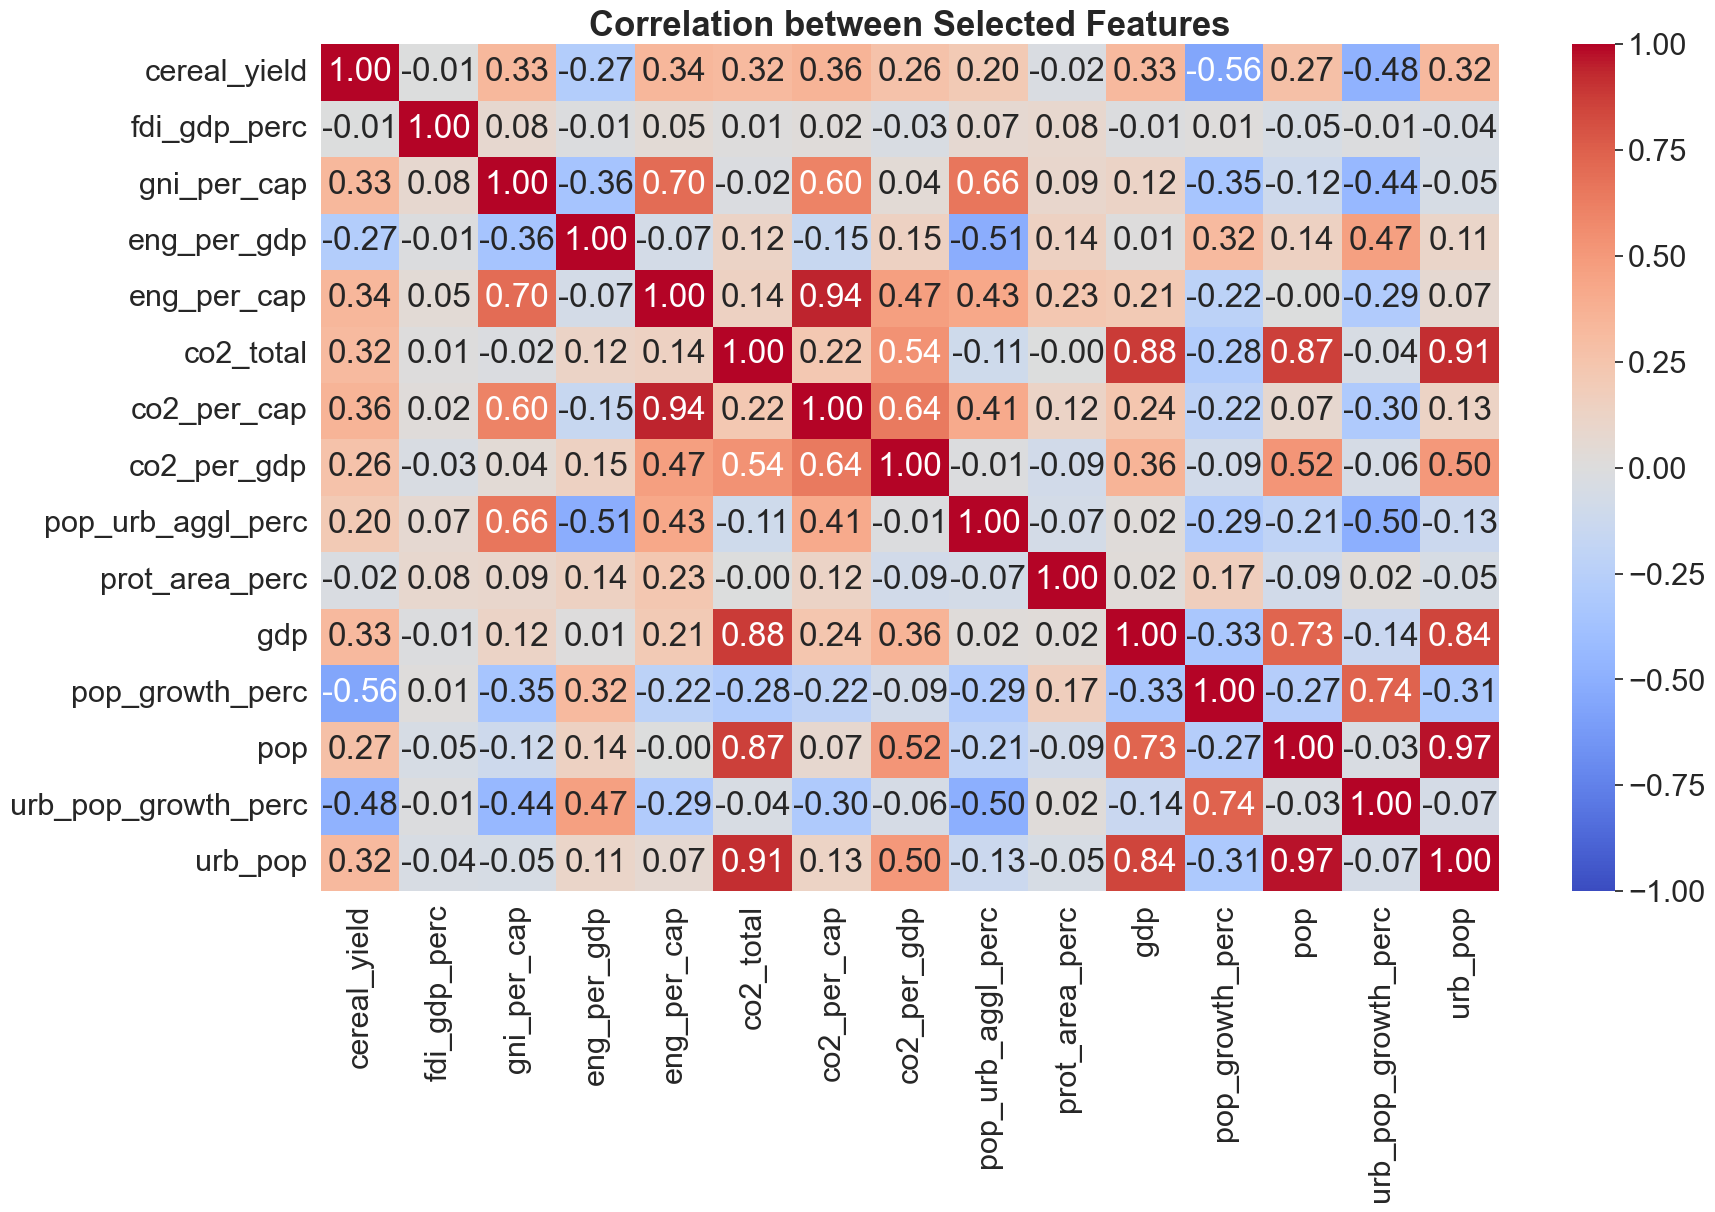

In [71]:
# Select the specific columns you want, excluding 'mort_rate'
features_all = all_vars_clean3[['cereal_yield', 'fdi_gdp_perc', 'gni_per_cap', 
                                'eng_per_gdp', 'eng_per_cap', 'co2_total', 
                                'co2_per_cap', 'co2_per_gdp', 'pop_urb_aggl_perc',
                                'prot_area_perc', 'gdp', 'pop_growth_perc', 
                                'pop', 'urb_pop_growth_perc', 'urb_pop']]

# Plot the correlation matrix
sns.set(font_scale=2)  # Adjust font size
f, ax = plt.subplots(figsize=(19, 11))  # Set figure size
sns.heatmap(features_all.corr(), 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            center=0, 
            vmin=-1, 
            vmax=1)
plt.title('Correlation between Selected Features', fontsize=25, weight='bold')
plt.show()

# Reset font scale for future plots
sns.set(font_scale=1)


In [72]:
features = all_vars_clean3[['country','cereal_yield','fdi_gdp_perc','gni_per_cap', 'eng_per_cap', 'co2_per_cap', 'co2_per_gdp',
                     'pop_urb_aggl_perc', 'prot_area_perc',  'pop_growth_perc', 'urb_pop_growth_perc']]

In [73]:
# a dictionary with feature labels
labels_dict = {'gni_per_cap':'GNI per capita [Atlas $]',
               'gdp':'Gross Domestic Product [$]',
               'cereal_yield':'Cereal yield [kg/ha]',
               'fdi_gdp_perc': 'Nationally terrestrial protected areas [% of total land area]',
               'fdi_perc_gdp': 'Foreign Direct Investment [% of GDP]',
               'pop_urb_aggl_perc': 'Population in urban agglomerations > 1mln [%]',
               'urb_pop_growth_perc':'Urban population growth [annual %]',
               'pop_growth_perc': 'Population growth [annual %]',
               'co2_per_cap':'CO2 emissions per capita [t]',
               'eng_per_cap':'Energy use per capita [kg oil eq]' }

### Let's take a look at the features highly correlated with our target

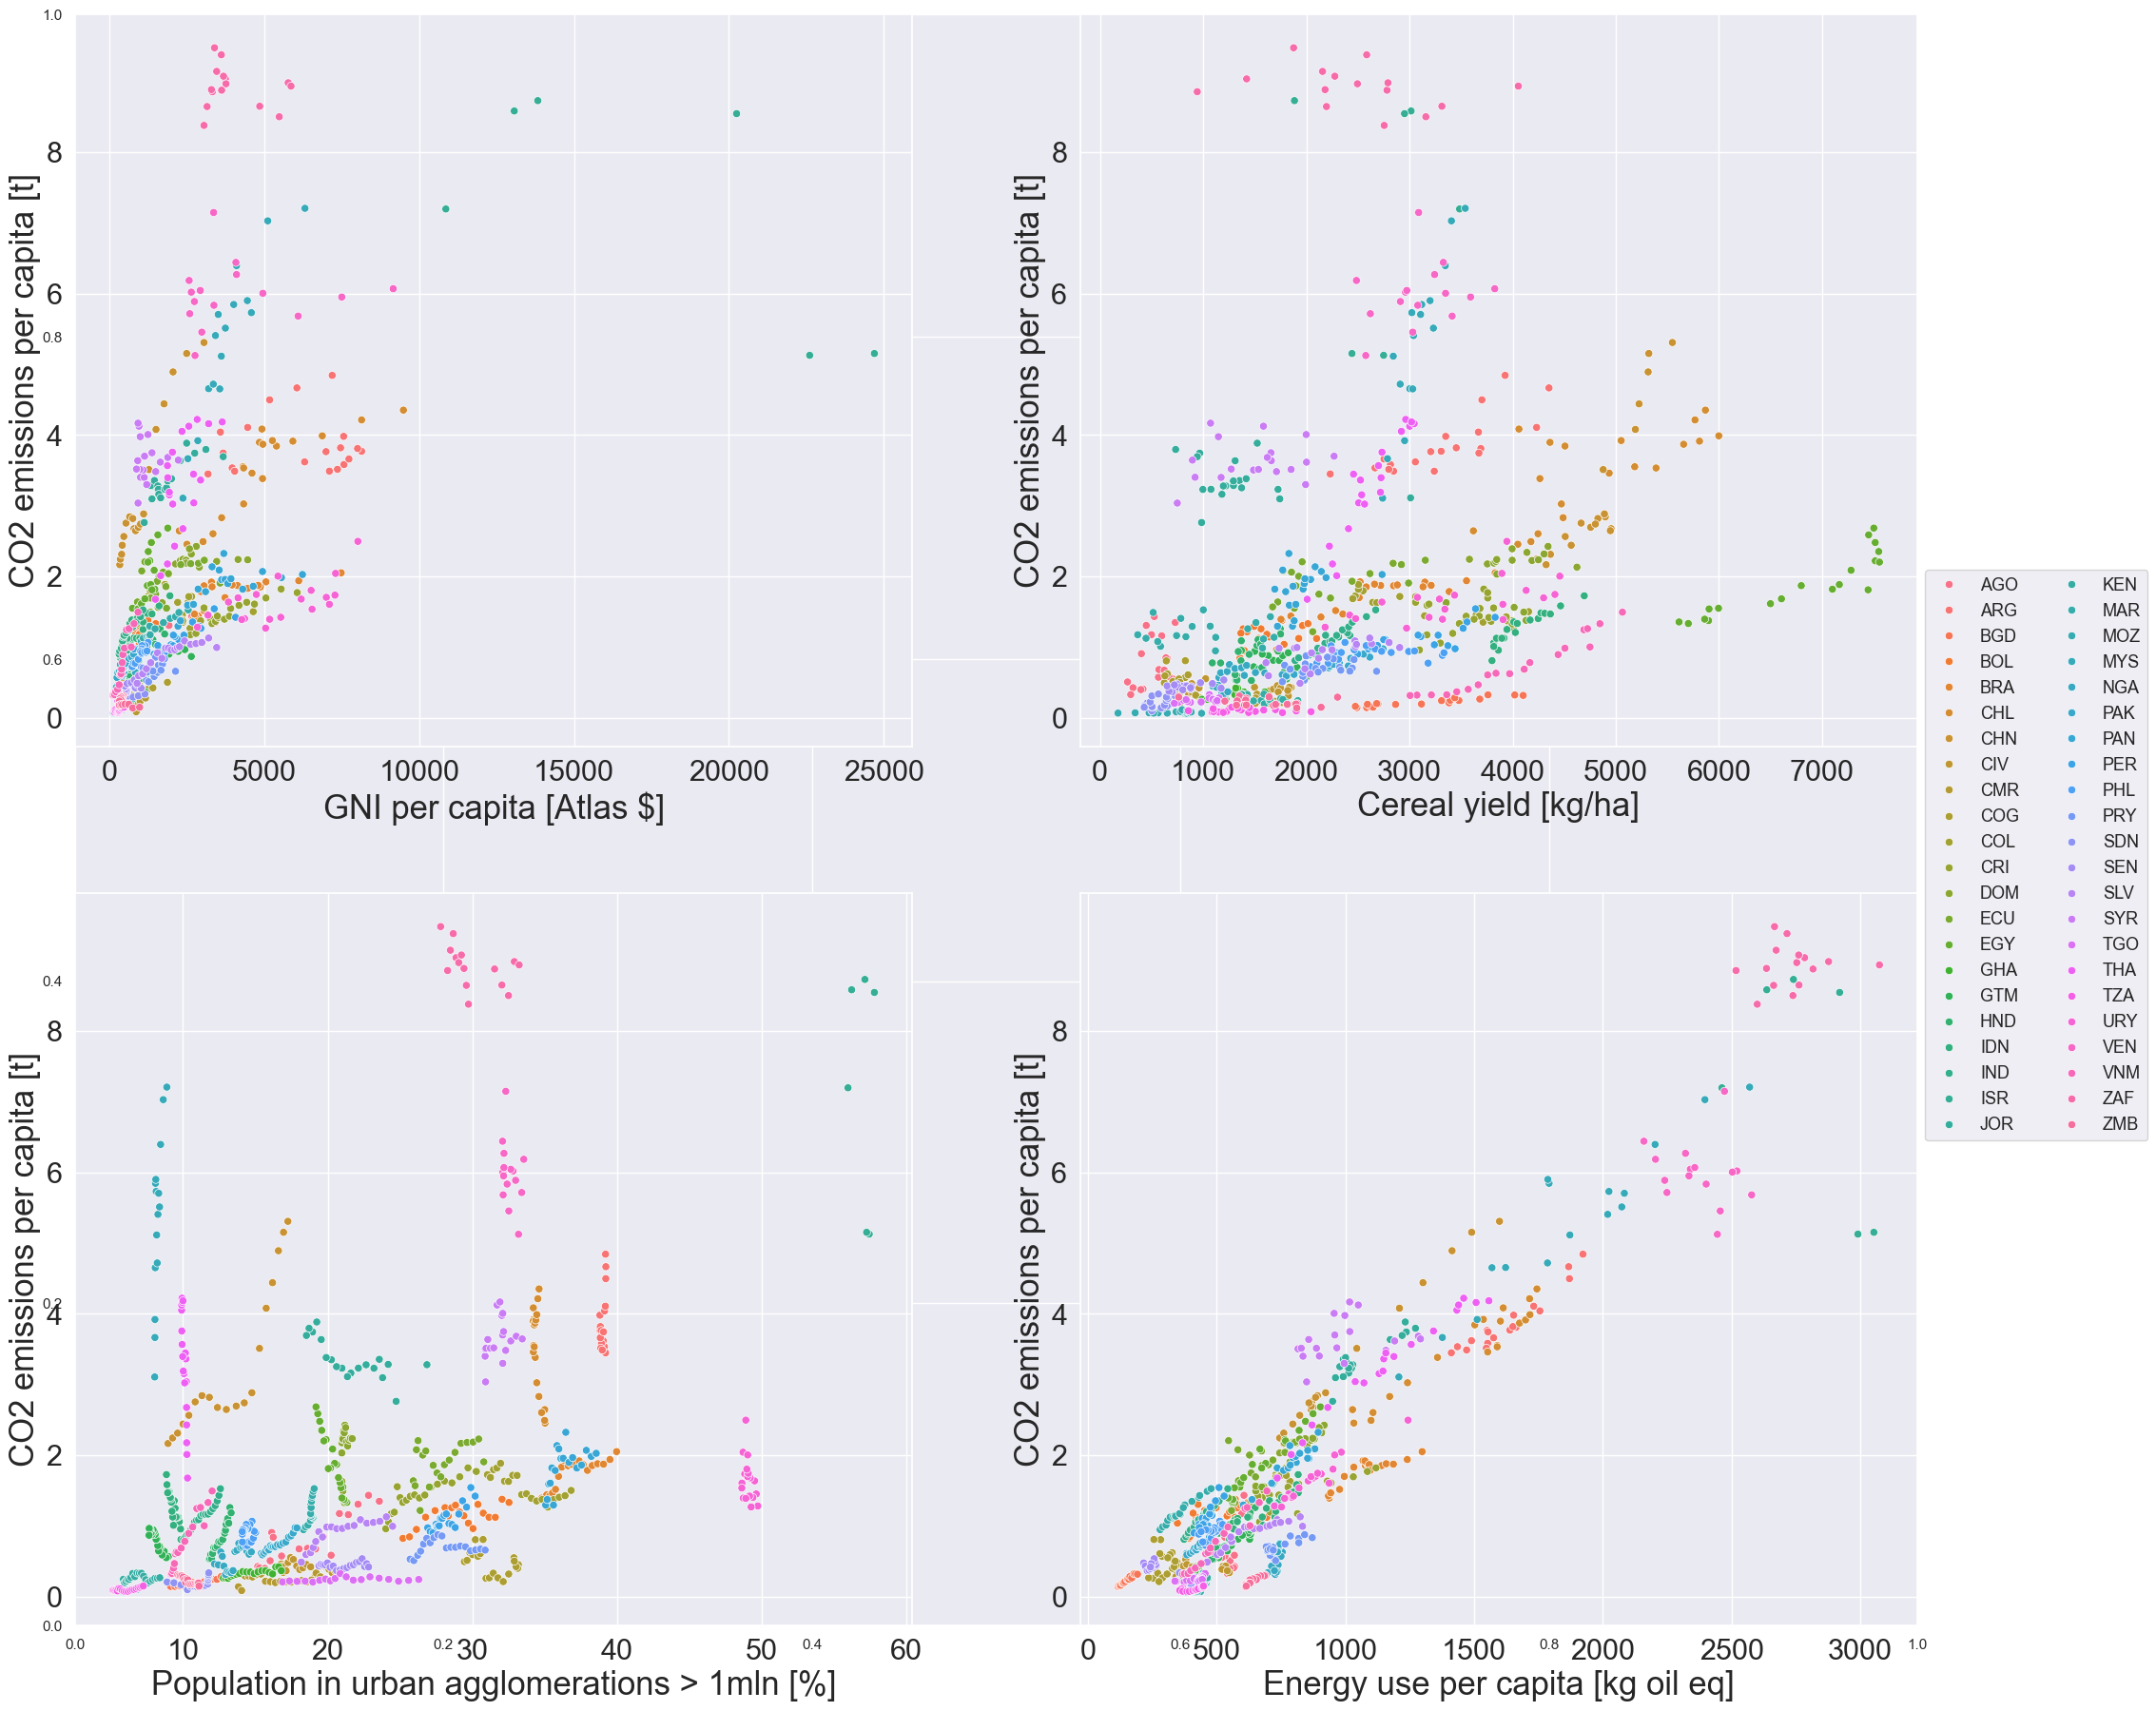

In [77]:
# set default settings of the seaborn library
sns.set()

# plot all scatterplots

fig,ax=plt.subplots(figsize=(25,22))
#fig.subplots_adjust(hspace=0.1, wspace=0.1)
ind=1


# set color theme
sns.set_context("paper")
sns.set(color_codes=True, font_scale=2)

for [col, label] in [['gni_per_cap',labels_dict['gni_per_cap']], ['cereal_yield',labels_dict['cereal_yield']], ['pop_urb_aggl_perc',labels_dict['pop_urb_aggl_perc']], ['eng_per_cap',labels_dict['eng_per_cap']]]:
    
    ax = fig.add_subplot(2,2,ind)
    sns.scatterplot(ax=ax, x=col, y="co2_per_cap", data=features, hue="country", legend='full')
    ax.legend_.remove()
    ax.set_xlabel(label, fontsize=25)
    ax.set_ylabel(labels_dict['co2_per_cap'], fontsize=25)
    ind+=1

# create common legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, loc='center right', fontsize=13)
plt.show()

### removing the highly correlated features to keep to keep only one of them

In [79]:
# Drop the specified columns
data = all_vars_clean3.drop(columns=['under_5_mort_rate', 'pop'])

# Check the updated DataFrame
all_vars_clean.head()


,country,year,cereal_yield,fdi_gdp_perc,elec_access_perc,eng_per_gdp,eng_per_cap,co2_total,co2_per_cap,co2_per_gdp,...,nat_emerg,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
66,AGO,1990,320.9,-3.263096,NaN,172.978279,569.242999,4429.736,0.428613,130.244398,...,NaN,15.171061,12.399821,1.026019e+10,740.0,243.0,2.771320,10335052.0,6.505966,3834304.292
67,AGO,1991,417.4,5.449515,NaN,179.271884,565.451027,4367.397,0.409949,129.971142,...,NaN,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,10653515.0,6.687032,4099472.572
68,AGO,1992,397.0,4.982460,NaN,193.632183,550.548264,4418.735,0.401597,141.244823,...,NaN,15.660630,12.399823,5.779394e+09,470.0,235.3,3.226990,11002910.0,6.750459,4385759.926
69,AGO,1993,267.8,5.715529,NaN,266.318379,551.688878,5801.194,0.510141,246.261769,...,NaN,16.025739,12.399823,5.285600e+09,310.0,231.1,3.297243,11371750.0,6.700777,4689709.700
70,AGO,1994,298.4,4.195018,NaN,260.830190,541.553067,3890.687,0.331321,159.575256,...,NaN,16.065941,12.399824,4.059577e+09,190.0,226.3,3.212170,11742960.0,6.503667,5004849.552


# Prediction

In [81]:
features

,country,cereal_yield,fdi_gdp_perc,gni_per_cap,eng_per_cap,co2_per_cap,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,pop_growth_perc,urb_pop_growth_perc
66,AGO,320.9,-3.263096,740.0,569.242999,0.428613,130.244398,15.171061,12.399821,2.771320,6.505966
67,AGO,417.4,5.449515,820.0,565.451027,0.409949,129.971142,15.290728,12.399822,3.034866,6.687032
68,AGO,397.0,4.982460,470.0,550.548264,0.401597,141.244823,15.660630,12.399823,3.226990,6.750459
69,AGO,267.8,5.715529,310.0,551.688878,0.510141,246.261769,16.025739,12.399823,3.297243,6.700777
70,AGO,298.4,4.195018,190.0,541.553067,0.331321,159.575256,16.065941,12.399824,3.212170,6.503667
...,...,...,...,...,...,...,...,...,...,...,...
5096,ZMB,1814.7,6.692190,420.0,625.212934,0.188389,167.396916,10.966125,35.983018,2.297012,2.411494
5097,ZMB,1900.7,4.972309,500.0,628.278283,0.197069,170.239886,11.036370,35.983018,2.383212,2.497563
5098,ZMB,1816.1,5.753860,620.0,628.740679,0.194427,162.084372,11.080795,35.983018,2.479312,2.878514
5099,ZMB,1907.9,11.470850,750.0,612.264860,0.142660,114.902108,11.103952,35.983018,2.564919,2.962534


In [83]:
feature_cols = ['cereal_yield', 'fdi_gdp_perc', 'eng_per_gdp',
       'eng_per_cap', 'co2_per_gdp',
       'pop_urb_aggl_perc', 'prot_area_perc', 'gdp', 'gni_per_cap',
       'pop_growth_perc', 'urb_pop']
label_col = ['co2_per_cap']

# convert into nympy arrays (required for scikit-learn models)
features = np.array(data[feature_cols])
labels =  np.array(data[label_col])



## Spliting the data in training (80%) and testing (20%) set

In [86]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


# Print the shape of the splits
print("Training set features:", X_train.shape)
print("Training set labels:", y_train.shape)
print("Testing set features:", X_test.shape)
print("Testing set labels:", y_test.shape)


Training set features: (649, 11)
Training set labels: (649, 1)
Testing set features: (163, 11)
Testing set labels: (163, 1)


## Model Selection

### Linear regression

Linear Regression is a simple and interpretable model that establishes a linear relationship between the independent variables and the target variable, CO2 per capita. It assumes that the predictors have a linear effect on the outcome, which makes it an excellent baseline model to understand the basic trends and correlations in the dataset. Linear Regression is computationally efficient and provides insight into the individual contributions of each feature to the prediction. As we saw in the visualizations above, there are quite a bit of  linear relationship between predictors and the target.

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)  # RMSE is sqrt(MSE)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Model:")
print("Mean Squared Error:", mse_lr)
print("Root Mean Squared Error:", rmse_lr)
print("R-squared:", r2_lr)


Linear Regression Model:
Mean Squared Error: 0.1390143144590162
Root Mean Squared Error: 0.37284623433664477
R-squared: 0.9601474327529096


C:\Users\33766\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Text(0, 0.5, 'Predicted Values')

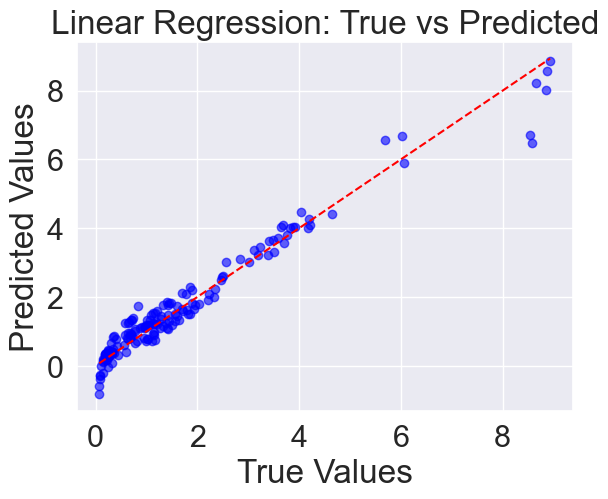

In [93]:
lr_pred = lr_model.predict(X_test)
# Linear Regression
plt.scatter(y_test, lr_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Linear Regression: True vs Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

### Random forest regressor

Random Forest is a versatile and powerful ensemble learning method that constructs multiple decision trees and aggregates their predictions. It can model complex non-linear relationships between features and the target variable, making it suitable for capturing intricate patterns in CO2 emissions data. Random Forest is robust to overfitting, thanks to its averaging mechanism, and handles missing values and noisy data effectively. Additionally, it provides feature importance scores, helping us identify which factors most strongly influence CO2 per capita.

Find the greatest parameter with GridSearchCV

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
rf_grid_search = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,
    verbose=2,
    scoring='neg_mean_squared_error'
)

# Fit the model
rf_grid_search.fit(X_train, y_train)

# Best hyperparameters and performance
print("Random Forest - Best Parameters:", rf_grid_search.best_params_)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


C:\Users\33766\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
275 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\33766\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\33766\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\33766\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\33766\anaconda3\Lib\site-pack

Random Forest - Best Parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


Predictions

In [100]:

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)  # RMSE is sqrt(MSE)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model:")
print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)
print("R-squared:", r2_rf)


C:\Users\33766\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Model:
Mean Squared Error: 0.07799819710929919
Root Mean Squared Error: 0.2792815731646096
R-squared: 0.9776395085099918


C:\Users\33766\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Text(0, 0.5, 'Predicted Values')

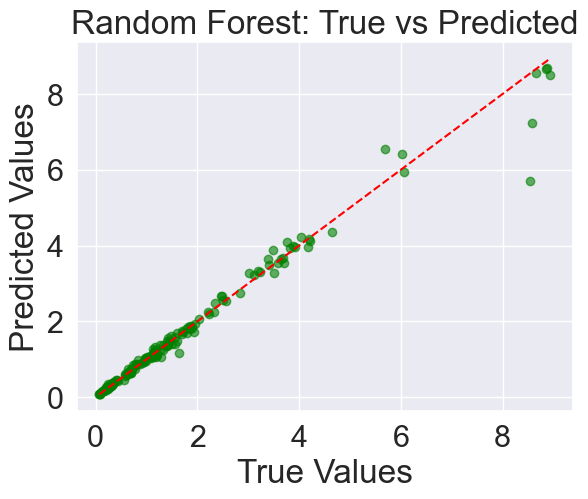

In [101]:
rf_pred = rf_model.predict(X_test)
# Random Forest
plt.scatter(y_test, rf_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Random Forest: True vs Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

### Gradient boosting

Gradient Boosting is an advanced ensemble method that builds a series of weak learners (decision trees), each correcting the errors of its predecessor. It is particularly effective for predicting CO2 per capita because of its ability to model subtle and intricate relationships in the data. Gradient Boosting optimizes predictive performance by minimizing errors iteratively, making it a top choice for handling complex datasets with diverse features. While more computationally intensive than Random Forest, Gradient Boosting often delivers higher accuracy and better generalization, especially when hyperparameters are carefully tuned.

In [104]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)  # RMSE is sqrt(MSE)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Model:")
print("Mean Squared Error:", mse_gb)
print("Root Mean Squared Error:", rmse_gb)
print("R-squared:", r2_gb)


C:\Users\33766\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Gradient Boosting Model:
Mean Squared Error: 0.06720850132955482
Root Mean Squared Error: 0.2592460247131184
R-squared: 0.9807326941168933


C:\Users\33766\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Text(0, 0.5, 'Predicted Values')

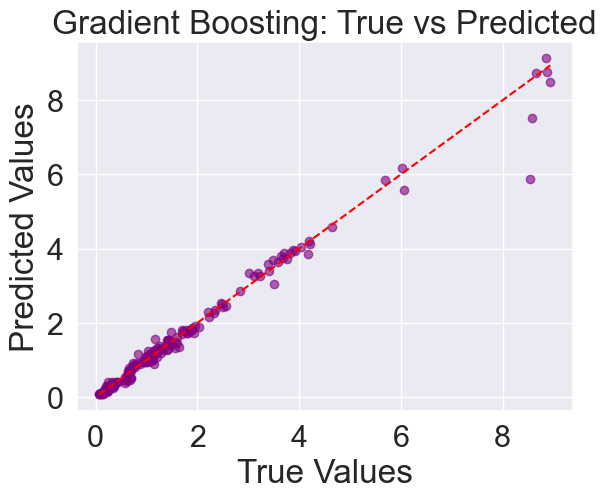

In [105]:
gb_pred = gb_model.predict(X_test)
# Gradient Boosting
plt.scatter(y_test, gb_pred, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Gradient Boosting: True vs Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

### Cross validation results

In [107]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation (e.g., k=5)
scores = cross_val_score(gb_model, features, labels, cv=5, scoring='neg_mean_squared_error')

# Take the negative mean of the MSE scores and calculate RMSE
mean_mse = -scores.mean()
mean_rmse = np.sqrt(mean_mse)

print("Cross-validation Mean MSE:", mean_mse)
print("Cross-validation Mean RMSE:", mean_rmse)


C:\Users\33766\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\33766\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\33766\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\33766\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was p

Cross-validation Mean MSE: 0.22541350450563852
Cross-validation Mean RMSE: 0.47477732096809183


## What is the best model?

The best model is the Random forest

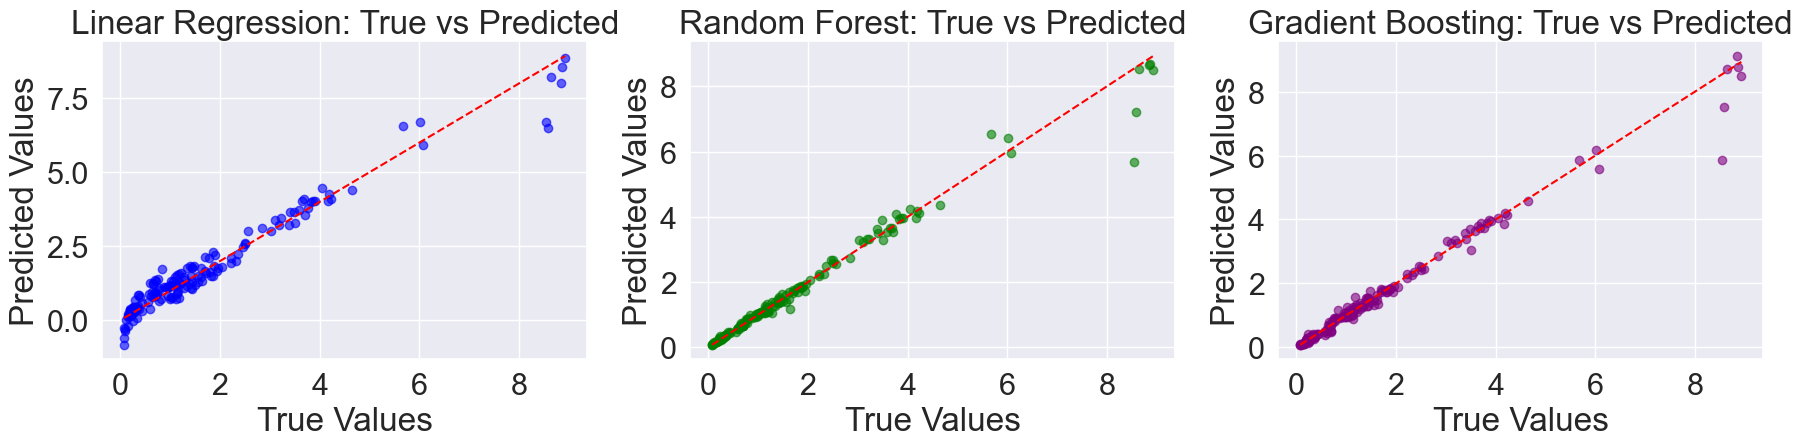

In [110]:
import matplotlib.pyplot as plt

# Predict with the trained models
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

# Plotting the true values vs. predicted values for each model
plt.figure(figsize=(18, 5))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, lr_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Linear Regression: True vs Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# Random Forest
plt.subplot(1, 3, 2)
plt.scatter(y_test, rf_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Random Forest: True vs Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# Gradient Boosting
plt.subplot(1, 3, 3)
plt.scatter(y_test, gb_pred, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Gradient Boosting: True vs Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# Show the plot
plt.tight_layout()
plt.show()


## Let's look at features impoetance for the random forest

C:\Users\33766\AppData\Local\Temp\ipykernel_18532\2304277134.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_importance_df, palette='viridis')


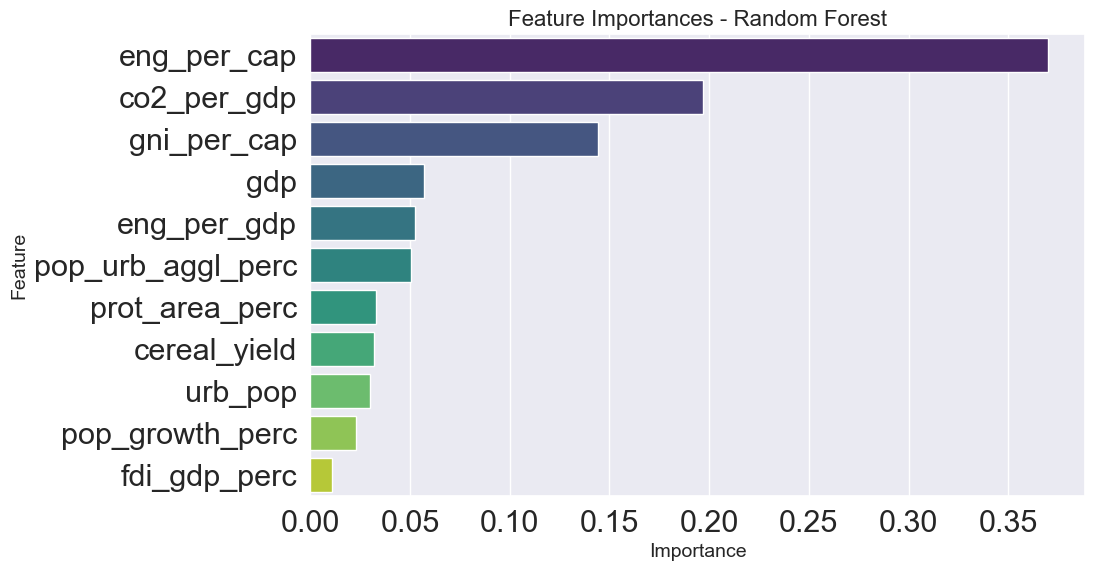

In [115]:
# Feature importances for Random Forest
best_rf_model = rf_grid_search.best_estimator_
rf_importances = best_rf_model.feature_importances_
rf_importance_df = pd.DataFrame({'Feature': feature_cols, 'Importance': rf_importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df, palette='viridis')
plt.title("Feature Importances - Random Forest", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.show()